<a href="https://colab.research.google.com/github/gopikanil/dsml/blob/main/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

In [ ]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


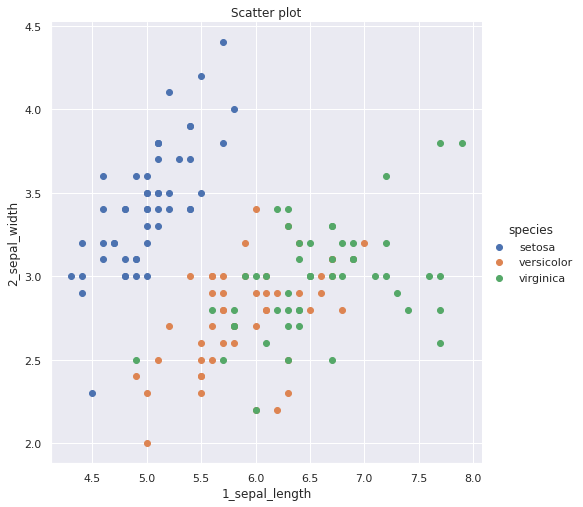

In [ ]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [ ]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
   scores_list = []
   classes = len(mu_list)
   for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
   return np.argmax(scores_list)
def predict_Bayes_class(X,mu_list,sigma_list): 
  scores_list = []
  classes = len(mu_list)
  for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
  return np.argmax(scores_list)

In [ ]:
#Plotting the decision boundaries
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


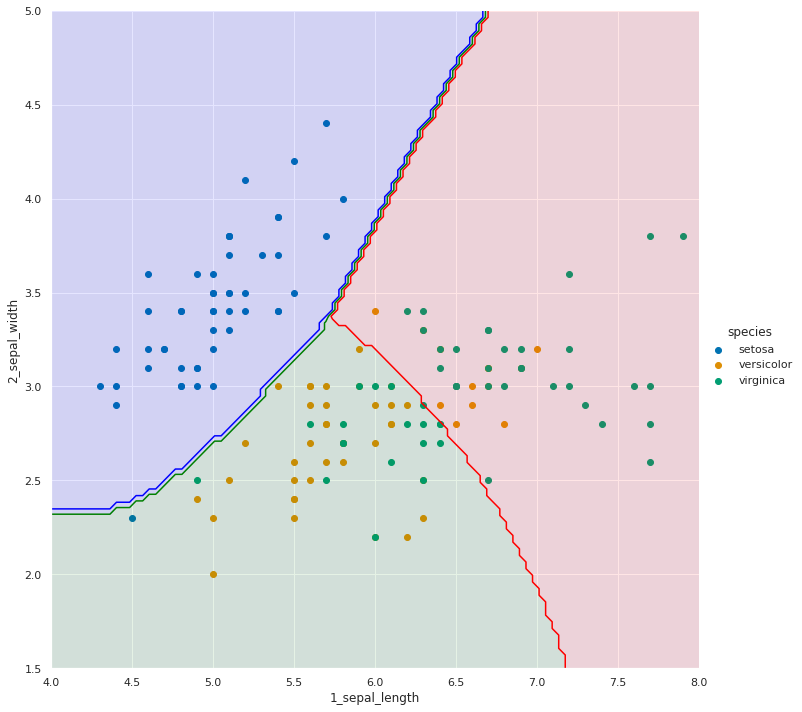

In [ ]:
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))


In [ ]:
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
iris=load_iris()

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
gnb=GaussianNB()
y_pred=gnb.fit(X_train,y_train).predict(X_test)
print(y_pred)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0]


In [ ]:
x_new=[[5,5,4,4]]
y_new=gnb.fit(X_train,y_train).predict(x_new)
print(y_new)
print("predicted output for {}: {}".format(x_new,iris.target_names[y_new]))
print("Naive bayes score               :",gnb.score(X_test,y_test))

[2]
predicted output for [[5, 5, 4, 4]]: ['virginica']
Naive bayes score               : 0.9777777777777777
